In [934]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [935]:
# approximation of line


# line is a combination of linear line weights dot features + weights (just normal linear line) and sigmoid
#    function.

# linear
# _ = wx+b

# sigmoid:
# ŷ = 1/(1+np.exponent(-x))  # x will be here actually linear (wx+b) 


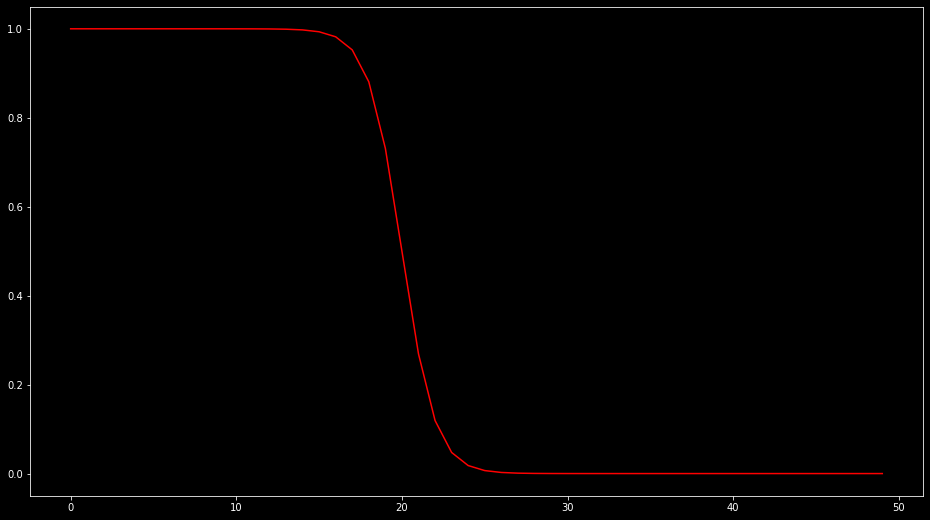

In [936]:
# some example of sigmoid function

sigm = 1/(1+np.exp(np.dot(np.array(range(50)), 1)-20))

plt.figure(figsize=(16, 9))
plt.style.use("dark_background")
plt.plot(sigm, color="red")
plt.show()

In [937]:
# data of plot above
sigm

array([9.99999998e-01, 9.99999994e-01, 9.99999985e-01, 9.99999959e-01,
       9.99999887e-01, 9.99999694e-01, 9.99999168e-01, 9.99997740e-01,
       9.99993856e-01, 9.99983299e-01, 9.99954602e-01, 9.99876605e-01,
       9.99664650e-01, 9.99088949e-01, 9.97527377e-01, 9.93307149e-01,
       9.82013790e-01, 9.52574127e-01, 8.80797078e-01, 7.31058579e-01,
       5.00000000e-01, 2.68941421e-01, 1.19202922e-01, 4.74258732e-02,
       1.79862100e-02, 6.69285092e-03, 2.47262316e-03, 9.11051194e-04,
       3.35350130e-04, 1.23394576e-04, 4.53978687e-05, 1.67014218e-05,
       6.14417460e-06, 2.26032430e-06, 8.31528028e-07, 3.05902227e-07,
       1.12535162e-07, 4.13993755e-08, 1.52299795e-08, 5.60279641e-09,
       2.06115362e-09, 7.58256042e-10, 2.78946809e-10, 1.02618796e-10,
       3.77513454e-11, 1.38879439e-11, 5.10908903e-12, 1.87952882e-12,
       6.91440011e-13, 2.54366565e-13])

In [938]:
# load data, or actually...create my own

NR_OF_SAMPLES = 1_000

# set random seed for reproducibility
random.seed(a=10, version=2)
np.random.seed(10)

# create my own dataset
row1 = [random.randint(0, 100) for _ in range(NR_OF_SAMPLES)]
row2 = [random.randint(0, 100) for _ in range(NR_OF_SAMPLES)]
class1 = [0] * NR_OF_SAMPLES

row3 = [random.randint(110, 210) for _ in range(NR_OF_SAMPLES)]
row4 = [random.randint(110, 210) for _ in range(NR_OF_SAMPLES)]
class2 = [1] * NR_OF_SAMPLES

a1 = np.array([row1, row2, class1]).T
a2 = np.array([row3, row4, class2]).T

res = np.concatenate((a1, a2))
np.random.shuffle(res)

# split at features and labels
X = res[:, 0:2]
y = res[:, -1]

In [954]:
res

array([[ 41,  89,   0],
       [169, 115,   1],
       [189, 121,   1],
       ...,
       [ 25,  97,   0],
       [127, 187,   1],
       [136, 156,   1]])

In [939]:
# split data at train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [940]:

class LogisticRegression:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.sigmoid_curve = None
        
    def fit(self, X, y):
        # init parameters with zeros
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
    
        # gradient descent loop
        for _ in range(self.n_iterations):
            
            # calculate current iteration of line/curve based on current weights and bias
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            
            # BACK PROPAGATION
            
            # calculate new weights
            # I tried here (1/n_samples) * np.sum(np.dot(X.T, (y_predicted - y))) from linear
            #    regression algorithm and it does not work. There should really be formula as below
            derivative_w = -(2/n_samples) * np.dot(X.T, y - y_predicted)  # derivative_of_weight  
            self.weights -= self.lr * derivative_w  # subtract old weight with learning rate * deriv'_of_weight  

            # calculate new bias (similar formula as above except sum instead of dot product)
            derivative_b = -(2/n_samples) * np.sum(y - y_predicted)  # derivative of bias
            self.bias -= self.lr * derivative_b

    def predict(self, X):
        # calculating with best bias and weights fit
        linear_model = np.dot(X, self.weights) + self.bias 
        y_predicted = self._sigmoid(linear_model)
        
        # label predictions as 1 and 0 from sigmoid curve
        y_predicted_classification = y_predicted > 0.5
        
        # get shape of predicted sigmoid curve
        self.sigmoid_curve = y_predicted
        
        return y_predicted_classification
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(- x))

In [941]:
# check number of correct vs incorrect predictions
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

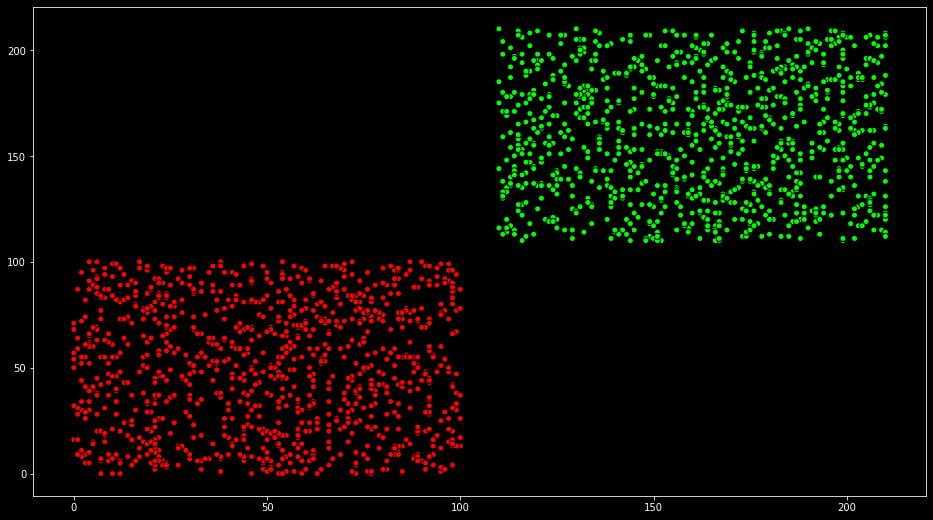

In [956]:
# plot distribution of complete dataset based on X and X values
cmap = ListedColormap(["#FF0000", "#00FF00"])
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors="k")
plt.show()

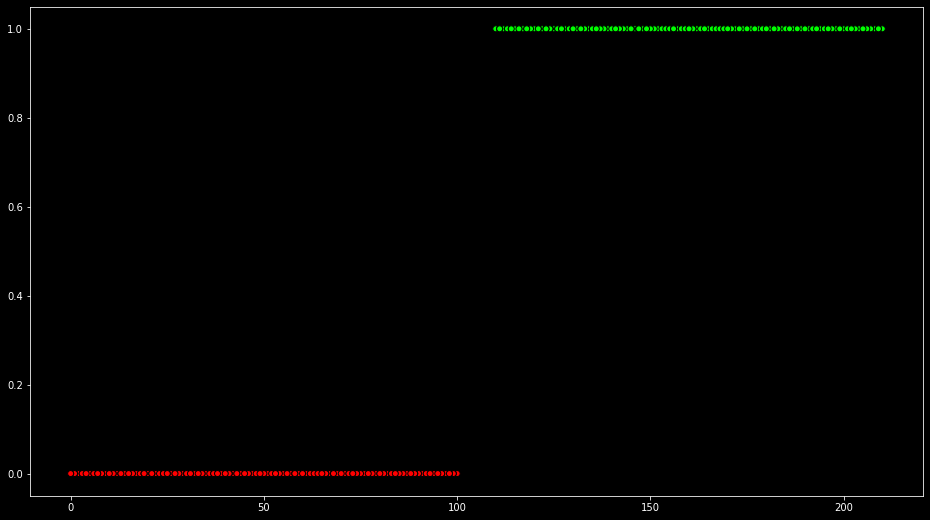

In [943]:
# plot distribution of complete dataset based on X and y values
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], y, c=y, cmap=cmap, edgecolors="k")
plt.show()

In [944]:
# fit and predict from our class LogisticRegression
regressor =  LogisticRegression(lr=0.01,  n_iterations=10_000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [945]:
# predict our accuracy (1 = 100%)
accuracy(y_true=y_test, y_pred=y_pred)

1.0

In [946]:
# display prediction labels
y_pred

array([False, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False,

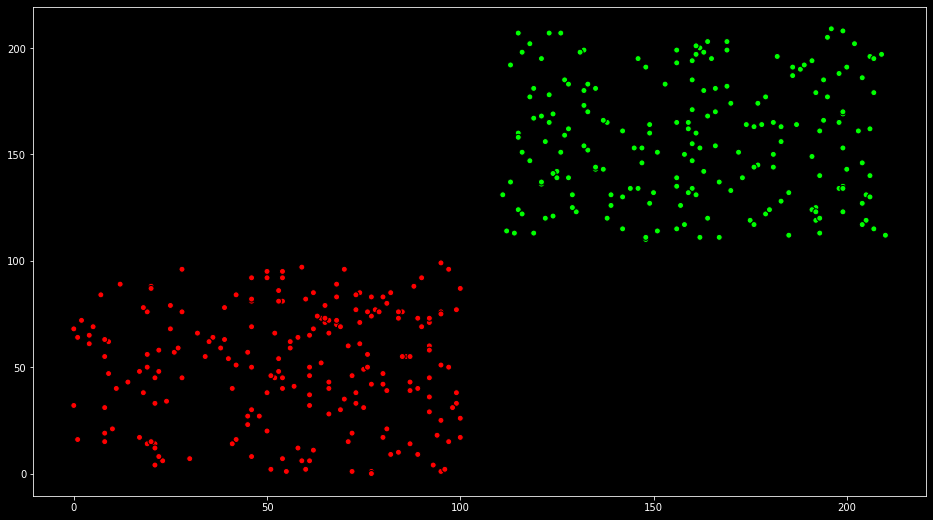

In [947]:
# plot our predictions based on X and X values
plt.figure(figsize=(16, 9))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cmap, edgecolors="k")
plt.show()

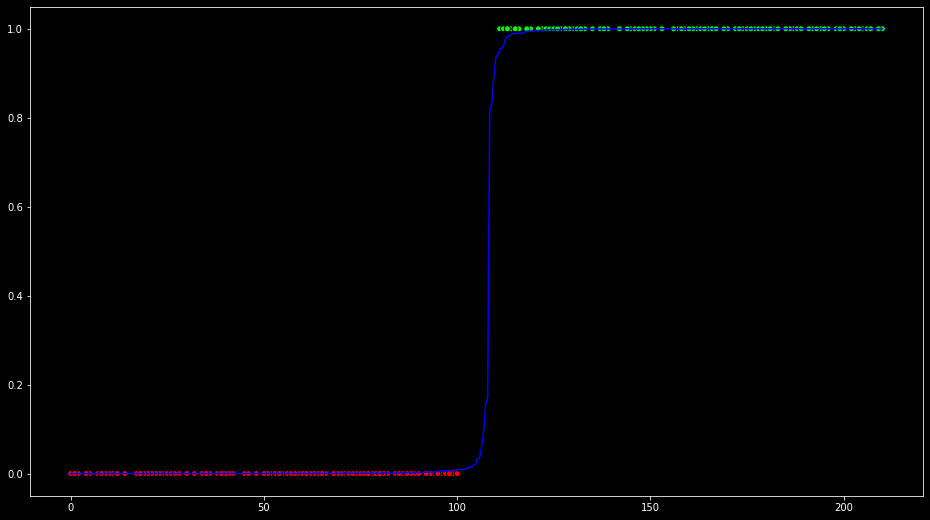

In [948]:
# plot distribution of test dataset based on X and y values + plot predicted sigmoid
sigm = regressor.sigmoid_curve

plt.figure(figsize=(16, 9))
plt.scatter(X_test[:, 0], y_pred, c=y_pred, cmap=cmap, edgecolors="k")
plt.plot(np.linspace(0, np.max(X), len(sigm)), sorted(sigm), c="b")
plt.show()

In [949]:
# visualise predicted sigmoid data
sigm

array([3.31782503e-03, 3.33159585e-02, 9.99928381e-01, 6.66025741e-04,
       9.99673792e-01, 9.99999993e-01, 9.99999850e-01, 1.22604978e-06,
       2.99332811e-07, 9.93029294e-05, 1.41067952e-04, 9.99999909e-01,
       2.26037633e-07, 9.99998684e-01, 9.99993852e-01, 1.60043401e-08,
       9.99998731e-01, 9.14259711e-04, 9.99536639e-01, 9.99999736e-01,
       4.56747190e-05, 9.99875767e-01, 7.66562257e-03, 9.99996969e-01,
       3.85035145e-05, 9.98770736e-01, 9.99999899e-01, 9.99047662e-01,
       6.57822205e-05, 9.99979967e-01, 9.99999742e-01, 9.99995487e-01,
       6.44183528e-05, 6.65587687e-08, 1.55580207e-06, 9.94543010e-01,
       4.07727458e-07, 9.99791568e-01, 2.41073387e-06, 6.29874921e-05,
       4.52942135e-04, 9.99989979e-01, 4.54239856e-04, 5.30581126e-05,
       4.68290122e-03, 8.32988839e-07, 9.99999399e-01, 9.99909258e-01,
       3.17491508e-03, 1.99438394e-03, 9.73487421e-03, 1.48396336e-04,
       9.99856726e-01, 9.99992277e-01, 1.65327852e-05, 9.99999766e-01,
      

In [950]:
##################################################
# check how we fare against sklearn
from sklearn.linear_model import LogisticRegression

regressor_skl = LogisticRegression()

regressor_skl.fit(X_train, y_train)
sklearn_pred =regressor_skl.predict(X_test)

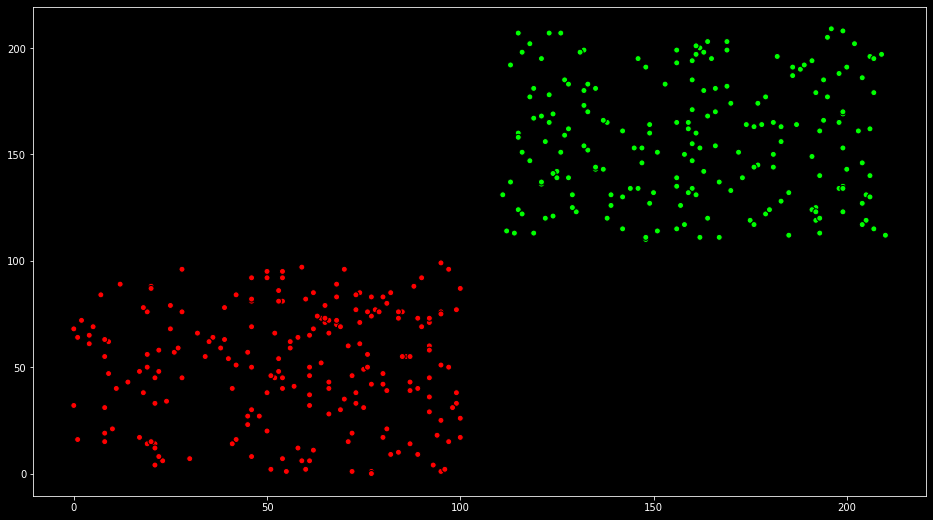

In [957]:
# plot sklearn predictions based on X and X values
plt.figure(figsize=(16, 9))
plt.scatter(X_test[:, 0], X_test[:, 1], c=sklearn_pred, cmap=cmap, edgecolors="k")
plt.show()

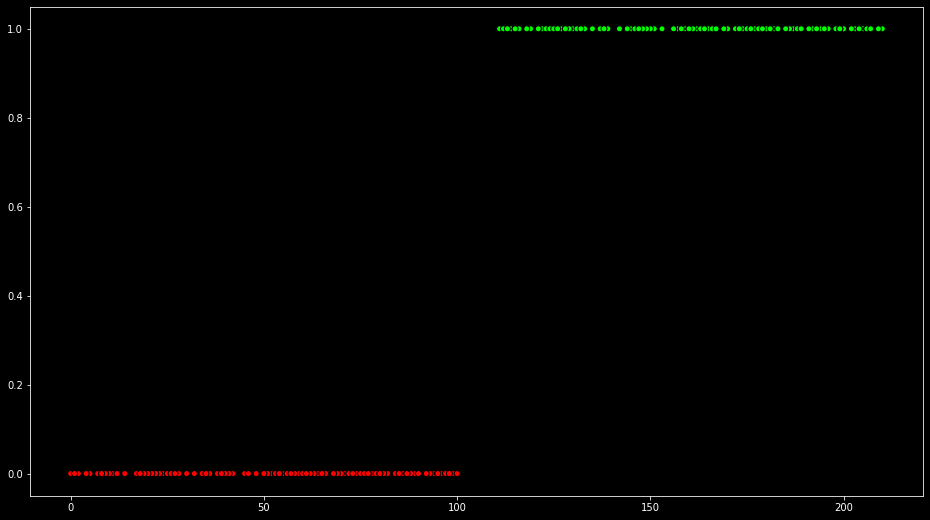

In [958]:
# plot distribution of test dataset based on X and y values
plt.figure(figsize=(16, 9))
plt.scatter(X_test[:, 0], sklearn_pred, c=sklearn_pred, cmap=cmap, edgecolors="k")
plt.show()

In [953]:
# accuracy of sklearn
accuracy(y_true=y_test, y_pred=sklearn_pred)

1.0